In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [121]:
covid = pd.read_csv('Complete_covid19_dataset.csv')

In [122]:
vaccination = pd.read_csv('Covid19-vaccination.csv')

In [123]:
# Check the number of the features and the observations
print('The COVID Dataset shape is',covid.shape)
print('The vaccination Dataset shape is',vaccination.shape)

The COVID Dataset shape is (134459, 67)
The vaccination Dataset shape is (63006, 16)


In [124]:
vaccination = vaccination.drop(vaccination[vaccination.total_vaccinations.isna()].index)
vaccination.shape

(35729, 16)

In [125]:
# Create a new dataframe
vaccination1 = vaccination.drop(vaccination[vaccination.people_vaccinated.isna()].index)
vaccination1.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,0.020


In [126]:
#correlation matrix

# plt.subplots(figsize=(12, 12))
# sns.heatmap(vaccination1.corr(), annot=True, square=True)
# plt.title('Correlation between each features in Vaccinations Dataframe')
# plt.show()



In [127]:
vaccination2 = vaccination1[~vaccination1.people_fully_vaccinated.isna()].copy()
vaccination2.shape

(30638, 16)

In [128]:
vaccination2=vaccination2.drop(vaccination1[vaccination1.total_vaccinations.isna()].index)
vaccination2.shape

(30638, 16)

In [129]:
# Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['people_fully_vaccinated'])
w, pvalue

/Users/jinyanhuang/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.18319565057754517, 0.0)

In [130]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.
w, pvalue = stats.shapiro(vaccination2['total_vaccinations'])
w, pvalue

(0.20982050895690918, 0.0)

In [131]:
# Create a new dataframe and delete the column 'daily_vaccinations' NA rows
vaccination3=vaccination1.drop(vaccination1[vaccination1.daily_vaccinations.isna()].index)
vaccination3.shape

(33635, 16)

In [132]:
# Create a new dataframe and delete the column 'daily_vaccinations_raw' NA rows
vaccination3=vaccination1.drop(vaccination1[vaccination1.daily_vaccinations_raw.isna()].index)
vaccination3.shape

(28485, 16)

In [133]:
covid = covid.drop(covid[covid.total_vaccinations.isna()].index)
covid.shape

(34276, 67)

In [134]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
364,AFG,Asia,Afghanistan,2021-02-22,55617.0,13.0,14.714,2433.0,1.0,0.857,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
370,AFG,Asia,Afghanistan,2021-02-28,55714.0,7.0,15.714,2443.0,0.0,1.571,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
386,AFG,Asia,Afghanistan,2021-03-16,55995.0,10.0,17.000,2460.0,1.0,1.286,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
408,AFG,Asia,Afghanistan,2021-04-07,56873.0,94.0,59.857,2512.0,0.0,4.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
423,AFG,Asia,Afghanistan,2021-04-22,58312.0,98.0,111.143,2561.0,4.0,4.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134453,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134454,ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134455,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134457,ZWE,Africa,Zimbabwe,2021-11-18,133593.0,36.0,37.714,4699.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [1]:
# Create a temporary df
covid1 = covid.drop(covid[covid.people_vaccinated.isna()].index)

covid1.shape

NameError: name 'covid' is not defined

In [136]:
new1=covid1.loc[:,'total_deaths':'new_deaths_smoothed_per_million']
new1

,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
364,2433.0,1.0,0.857,1396.169,0.326,0.369,61.076,0.025,0.022
370,2443.0,0.0,1.571,1398.604,0.176,0.394,61.327,0.000,0.039
386,2460.0,1.0,1.286,1405.658,0.251,0.427,61.754,0.025,0.032
408,2512.0,0.0,4.000,1427.699,2.360,1.503,63.059,0.000,0.100
423,2561.0,4.0,4.000,1463.823,2.460,2.790,64.290,0.100,0.100
...,...,...,...,...,...,...,...,...,...
134453,4696.0,0.0,1.571,8840.875,2.319,2.281,311.155,0.000,0.104
134454,4697.0,1.0,1.000,8841.538,0.663,2.205,311.221,0.066,0.066
134455,4698.0,1.0,1.000,8845.977,4.439,2.489,311.287,0.066,0.066
134457,4699.0,0.0,0.714,8851.808,2.385,2.499,311.353,0.000,0.047


In [137]:
new2=covid1.loc[:,'total_vaccinations':'new_people_vaccinated_smoothed']
new2

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed
364,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
370,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0
386,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0
408,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0
423,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
134453,6165714.0,3469198.0,2696516.0,NaN,10344.0,20608.0,40.85,22.99,17.87,NaN,1365.0,13782.0
134454,6190303.0,3484207.0,2706096.0,NaN,24589.0,22283.0,41.02,23.09,17.93,NaN,1476.0,14852.0
134455,6228119.0,3515140.0,2712979.0,NaN,37816.0,24487.0,41.27,23.29,17.98,NaN,1622.0,17188.0
134457,6310431.0,3583256.0,2727175.0,NaN,NaN,29822.0,41.81,23.74,18.07,NaN,1976.0,22810.0


In [138]:
new3=covid1.loc[:,'location']
new3

364       Afghanistan
370       Afghanistan
386       Afghanistan
408       Afghanistan
423       Afghanistan
             ...     
134453       Zimbabwe
134454       Zimbabwe
134455       Zimbabwe
134457       Zimbabwe
134458       Zimbabwe
Name: location, Length: 32410, dtype: object

In [139]:
new_df_part4=pd.concat([new1,new2,new3], axis=1)
new_df_part4

,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_vaccinations,...,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,location
364,2433.0,1.0,0.857,1396.169,0.326,0.369,61.076,0.025,0.022,0.0,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,Afghanistan
370,2443.0,0.0,1.571,1398.604,0.176,0.394,61.327,0.000,0.039,8200.0,...,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,Afghanistan
386,2460.0,1.0,1.286,1405.658,0.251,0.427,61.754,0.025,0.032,54000.0,...,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,Afghanistan
408,2512.0,0.0,4.000,1427.699,2.360,1.503,63.059,0.000,0.100,120000.0,...,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,Afghanistan
423,2561.0,4.0,4.000,1463.823,2.460,2.790,64.290,0.100,0.100,240000.0,...,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134453,4696.0,0.0,1.571,8840.875,2.319,2.281,311.155,0.000,0.104,6165714.0,...,NaN,10344.0,20608.0,40.85,22.99,17.87,NaN,1365.0,13782.0,Zimbabwe
134454,4697.0,1.0,1.000,8841.538,0.663,2.205,311.221,0.066,0.066,6190303.0,...,NaN,24589.0,22283.0,41.02,23.09,17.93,NaN,1476.0,14852.0,Zimbabwe
134455,4698.0,1.0,1.000,8845.977,4.439,2.489,311.287,0.066,0.066,6228119.0,...,NaN,37816.0,24487.0,41.27,23.29,17.98,NaN,1622.0,17188.0,Zimbabwe
134457,4699.0,0.0,0.714,8851.808,2.385,2.499,311.353,0.000,0.047,6310431.0,...,NaN,NaN,29822.0,41.81,23.74,18.07,NaN,1976.0,22810.0,Zimbabwe


In [140]:
# Group data by 'people_vaccinated', and sort them in location and select the max data because data changes everyday 
Order_people_vaccinations = vaccination.groupby('location').people_vaccinated.max()
Order_people_vaccinations= Order_people_vaccinations.sort_values(ascending=False)
Order_people_vaccinations= pd.DataFrame(Order_people_vaccinations)
Order_people_vaccinations.head(20)

,people_vaccinated
location,
World,4.197512e+09
Asia,2.882381e+09
Upper middle income,1.883448e+09
Lower middle income,1.390193e+09
China,1.225000e+09
High income,8.904829e+08
India,7.669880e+08
Europe,4.622119e+08
North America,3.780404e+08


In [141]:
#covid.location.value_counts()
# There are too many name which are the general name for country, such as 'World','Lower Middle Income', 'Asia'
first_five_total_vacc=Order_people_vaccinations.iloc[[4,6,11,12,13,14,15,16,17,18],:]
# Convert meaningful values into a regular column
first_five_total_vacc['location'] = first_five_total_vacc.index
first_five_total_vacc

/var/folders/ys/__80j13x36jdpb9j1fd0t3jr0000gn/T/ipykernel_77488/2761646447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five_total_vacc['location'] = first_five_total_vacc.index


,people_vaccinated,location
location,,
China,1.225000e+09,China
India,7.669880e+08,India
United States,2.302987e+08,United States
Brazil,1.624368e+08,Brazil
Africa,1.392699e+08,Africa
Indonesia,1.344183e+08,Indonesia
Japan,9.954649e+07,Japan
Pakistan,7.884517e+07,Pakistan
Mexico,7.586211e+07,Mexico


In [142]:
# Group data by 'people_vaccinated', and sort them in location
Order_fully_vaccinations_hundred = vaccination.groupby('location').people_vaccinated_per_hundred.max()
Order_fully_vaccinations_hundred= Order_fully_vaccinations_hundred.sort_values(ascending=False)
Order_fully_vaccinations_hundred= pd.DataFrame(Order_fully_vaccinations_hundred)
Order_fully_vaccinations_hundred.head(20)

,people_vaccinated_per_hundred
location,
Gibraltar,121.37
Pitcairn,100.00
United Arab Emirates,98.10
Singapore,92.99
Brunei,90.56
Cuba,89.47
Portugal,89.04
Chile,87.38
Cayman Islands,86.25


In [143]:
# Ignore the meaningless data 
Order_fully_vaccinations_hundred_top = Order_fully_vaccinations_hundred[1:6]
Order_fully_vaccinations_hundred_top

,people_vaccinated_per_hundred
location,
Pitcairn,100.00
United Arab Emirates,98.10
Singapore,92.99
Brunei,90.56
Cuba,89.47


In [144]:
# Extract only three columns.
temp1=vaccination.loc[:,['location', 'date', 'people_fully_vaccinated_per_hundred']]
temp1

,location,date,people_fully_vaccinated_per_hundred
0,Afghanistan,2021-02-22,NaN
6,Afghanistan,2021-02-28,NaN
22,Afghanistan,2021-03-16,NaN
44,Afghanistan,2021-04-07,NaN
59,Afghanistan,2021-04-22,NaN
...,...,...,...
63000,Zimbabwe,2021-11-16,17.98
63002,Zimbabwe,2021-11-18,18.07
63003,Zimbabwe,2021-11-19,18.14
63004,Zimbabwe,2021-11-20,18.18


In [145]:
temp1_Pitcairn=temp1[temp1.location == 'Pitcairn']
temp1_United_Arab_Emirates=temp1[temp1.location == 'United Arab Emirates']
temp1_Singapore=temp1[temp1.location == 'Singapore']
temp1_Brunei=temp1[temp1.location == 'Brunei']
temp1_Cuba=temp1[temp1.location == 'Cuba']

In [146]:
temp1_United_Arab_Emirates.head(200)

,location,date,people_fully_vaccinated_per_hundred
58898,United Arab Emirates,2021-01-05,NaN
58899,United Arab Emirates,2021-01-06,NaN
58900,United Arab Emirates,2021-01-07,NaN
58901,United Arab Emirates,2021-01-08,NaN
58902,United Arab Emirates,2021-01-09,NaN
...,...,...,...
59109,United Arab Emirates,2021-08-04,70.48
59110,United Arab Emirates,2021-08-05,70.78
59111,United Arab Emirates,2021-08-06,70.98
59112,United Arab Emirates,2021-08-07,71.27


In [147]:
# Temporary to delete the temp dataframe 0 value
temp1_United_Arab_Emirates=temp1_United_Arab_Emirates.drop(temp1_United_Arab_Emirates[temp1_United_Arab_Emirates.people_fully_vaccinated_per_hundred==0].index)
temp1_Singapore=temp1_Singapore.drop(temp1_Singapore[temp1_Singapore.people_fully_vaccinated_per_hundred==0].index)

In [148]:
# Group data by 'people_vaccinated', and sort them in location
Order_daily_vaccinations= vaccination.groupby('location').daily_vaccinations.max()
Order_daily_vaccinations= Order_daily_vaccinations.sort_values(ascending=False)
Order_daily_vaccinations= pd.DataFrame(Order_daily_vaccinations)
Order_daily_vaccinations.head(20)

,daily_vaccinations
location,
World,43233999.0
Asia,33335736.0
Upper middle income,27439252.0
China,22424286.0
Lower middle income,16674499.0
India,10037995.0
High income,8397153.0
Europe,5128678.0
North America,4173238.0


In [149]:
# There are too many name which are the general name for country, such as 'World','Lower Middle Income', 'Asia'
first_five_daily_vacc=Order_daily_vaccinations.iloc[[3,5,11,12,13,14,15,16,17,18],:]
first_five_daily_vacc['location'] = first_five_daily_vacc.index
first_five_daily_vacc

/var/folders/ys/__80j13x36jdpb9j1fd0t3jr0000gn/T/ipykernel_77488/2424294992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five_daily_vacc['location'] = first_five_daily_vacc.index


,daily_vaccinations,location
location,,
China,22424286.0,China
India,10037995.0,India
United States,3499189.0,United States
Brazil,2595170.0,Brazil
Africa,2030907.0,Africa
Japan,1997542.0,Japan
Indonesia,1901294.0,Indonesia
Mexico,1648223.0,Mexico
Vietnam,1632517.0,Vietnam


# Model

-- Arima

In [150]:
#Create new columns based on distinct values and count them
vaccination_arima = vaccination.sort_values('location')
vaccination_arima['eid'] = (vaccination_arima.groupby(['location']).cumcount()==0).astype(int)
vaccination_arima['eid'] =vaccination_arima['eid'].cumsum()
vaccination_arima

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,eid
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,1
265,Afghanistan,AFG,2021-11-14,4018197.0,3530173.0,3188609.0,NaN,NaN,36635.0,10.09,8.86,8.00,NaN,920.0,60035.0,0.151,1
220,Afghanistan,AFG,2021-09-30,2369625.0,828601.0,NaN,NaN,NaN,12999.0,5.95,2.08,NaN,NaN,326.0,1853.0,0.005,1
190,Afghanistan,AFG,2021-08-31,1979652.0,773002.0,NaN,NaN,NaN,70761.0,4.97,1.94,NaN,NaN,1776.0,224.0,0.001,1
179,Afghanistan,AFG,2021-08-20,1201286.0,770542.0,430744.0,NaN,NaN,1119.0,3.02,1.93,1.08,NaN,28.0,690.0,0.002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62827,Zimbabwe,ZWE,2021-05-27,953367.0,648119.0,305248.0,NaN,16349.0,9665.0,6.32,4.29,2.02,NaN,640.0,3614.0,0.024,235
62828,Zimbabwe,ZWE,2021-05-28,976774.0,656628.0,320146.0,NaN,23407.0,10389.0,6.47,4.35,2.12,NaN,688.0,3755.0,0.025,235
62829,Zimbabwe,ZWE,2021-05-29,1002443.0,666784.0,335659.0,NaN,25669.0,13559.0,6.64,4.42,2.22,NaN,898.0,5052.0,0.033,235
62813,Zimbabwe,ZWE,2021-05-13,751998.0,559873.0,192125.0,NaN,21655.0,20666.0,4.98,3.71,1.27,NaN,1369.0,11672.0,0.077,235


In [151]:
vaccination_arima[vaccination_arima.location=='Canada'].eid.unique()

array([38])

In [152]:
vaccination_arima[vaccination_arima['location'] == 'United States'].eid.unique()

array([223])

In [153]:
number_canada = vaccination_arima.loc[vaccination_arima['eid']==38]

canada = number_canada.sort_values('people_vaccinated_per_hundred')

In [154]:
value_canada = canada['people_vaccinated_per_hundred'].values
value_canada

array([0.000e+00, 0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 6.000e-02, 7.000e-02, 9.000e-02, 1.200e-01, 1.300e-01,
       1.300e-01, 1.400e-01, 1.500e-01, 1.900e-01, 2.300e-01, 2.600e-01,
       2.800e-01, 2.900e-01, 3.000e-01, 3.600e-01, 4.100e-01, 4.800e-01,
       5.800e-01, 6.900e-01, 7.800e-01, 8.400e-01, 9.400e-01, 1.020e+00,
       1.080e+00, 1.180e+00, 1.300e+00, 1.390e+00, 1.460e+00, 1.570e+00,
       1.670e+00, 1.750e+00, 1.850e+00, 1.930e+00, 1.990e+00, 2.020e+00,
       2.060e+00, 2.120e+00, 2.150e+00, 2.190e+00, 2.220e+00, 2.240e+00,
       2.250e+00, 2.290e+00, 2.310e+00, 2.320e+00, 2.340e+00, 2.360e+00,
       2.380e+00, 2.400e+00, 2.430e+00, 2.450e+00, 2.480e+00, 2.510e+00,
       2.550e+00, 2.580e+00, 2.590e+00, 2.590e+00, 2.610e+00, 2.630e+00,
       2.650e+00, 2.710e+00, 2.800e+00, 2.880e+00, 2.960e+00, 3.040e+00,
       3.120e+00, 3.230e+00, 3.380e+00, 3.520e+00, 3.630e+00, 3.750e+00,
       3.920e+00, 4.100e+00, 4.290e+00, 4.510e+00, 

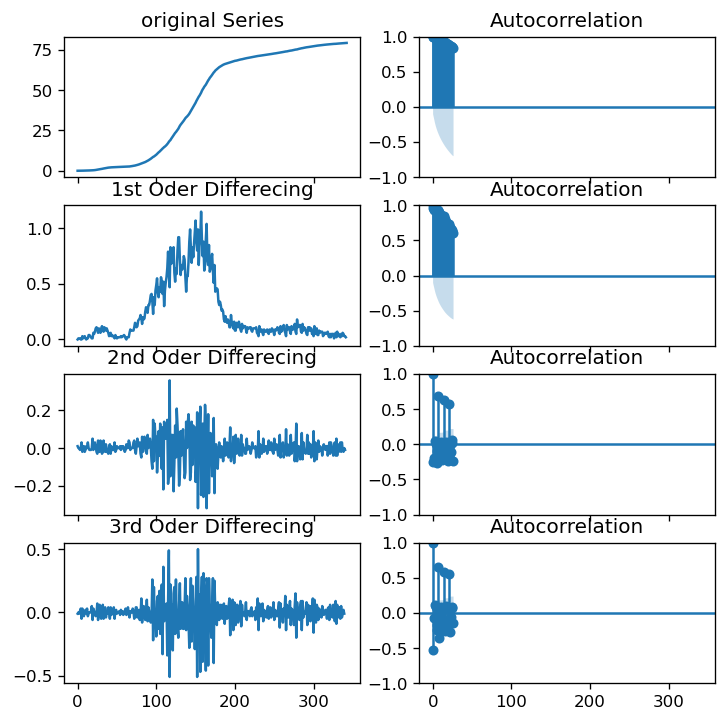

In [164]:
# Appling differencing can help stabilize the mean of a time sesries by removing changes in the level of a time series and eliminate trend and seasonality.

plt.rcParams.update({'figure.figsize':(7,7),'figure.dpi':120})

#original Series
fig, axes = plt.subplots(4,2,sharex=True)
axes[0,0].plot(value_canada); axes[0,0].set_title('original Series')
plot_acf(value_canada,ax=axes[0,1])

# 1st Differencing
axes[1,0].plot(np.diff(value_canada));axes[1,0].set_title('1st Oder Differecing')
plot_acf(np.diff(value_canada),ax=axes[1,1])
diffval=np.diff(value_canada)


# 2nd Differencing
axes[2,0].plot(np.diff(diffval));axes[2,0].set_title('2nd Oder Differecing')
plot_acf(np.diff(diffval),ax=axes[2,1])
diffva2=np.diff(diffval)


# 3rd Differencing
axes[3,0].plot(np.diff(diffva2));axes[3,0].set_title('3rd Oder Differecing')
plot_acf(np.diff(diffva2),ax=axes[3,1])
diffv3=np.diff(diffva2)

plt.show()

In [165]:
model=pm.auto_arima(value_canada,start_p=1,start_q=1,
test='adf',
max_p=4, max_q=4,
m=1,
d=None,
seasonal=False,
start_P=0,
alpha=0.001,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-827.550, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-774.375, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-794.401, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-817.567, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-776.375, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-829.741, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-818.651, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-827.765, Time=0.13 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-827.927, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-829.936, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-831.341, Time=0.05 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-829.977, Time=0.10 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-834.738, Time=0.22 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-878.442, Time=0.24 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept

# we choose the model arima(2,2,3)

In [166]:
len(value_canada)

343

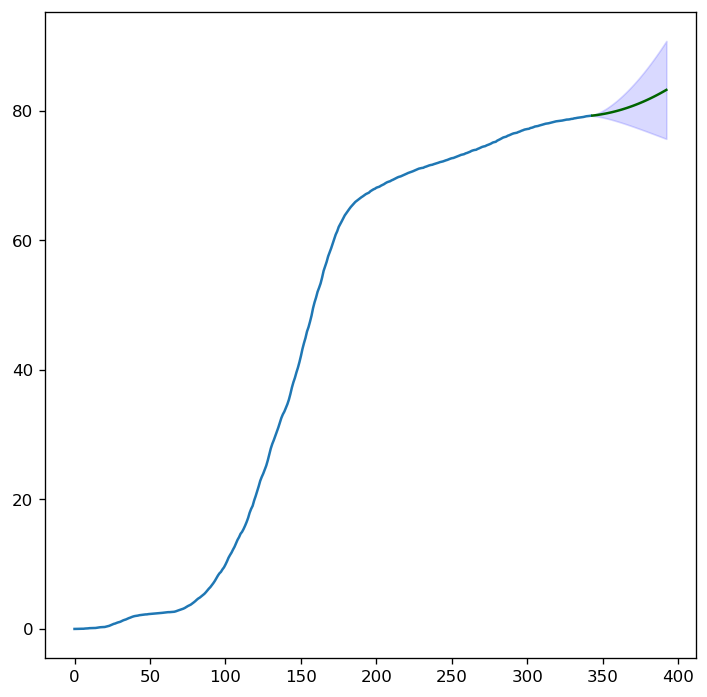

In [171]:
# Forecast
n_periods=50
# predict model ---- using model.predict
fc, confint = model.predict(n_periods=n_periods,return_conf_int=True, alpha=0.5)
index_of_fc=np.arange(len(value_canada),len(value_canada)+n_periods)
fc_series = pd.Series(fc, index=index_of_fc)
lower_series=pd.Series(confint[:,0],index=index_of_fc)
upper_series=pd.Series(confint[:,1],index=index_of_fc)

#Plot
plt.plot(value_canada)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, lower_series, upper_series,color='b',alpha=.15)
plt.show()


In [173]:
# get the final day's people_vaccinated_per_hundred
final_day_vacc_rate=value_canada[-1]/100
final_day_vacc_rate

0.7920999999999999

In [177]:
float(covid[covid.location =='Canada'].population.unique())

38067913.0

In [180]:
# Get the population of the Canada
canada_population=float(covid[covid.location =='Canada'].population.unique())
print ('The Population of Canada is', canada_population)

# Get the population of the UK
UK_population=float(covid[covid.location =='United Kingdom'].population.unique())
print ('The Population of UK is',float(covid[covid.location =='United Kingdom'].population.unique()))

# US population 
US_population = float(covid[covid.location == 'United States'].population.unique())
print ('The Population of US is', US_population)

The Population of Canada is 38067913.0
The Population of UK is 68207114.0
The Population of US is 332915074.0


In [160]:
# forecast the base case of the increase number of people vaccinated per hundard rate in 50 days
base_case = fc_series/100-final_day_vacc_rate
base_case_total = fc_series/100
base_case_increase_num = base_case*canada_population
base_case_num_total = base_case_total*canada_population

base_case_summary_df = pd.concat([base_case_increase_num,base_case_num_total],axis=1)
base_case_summary_df.columns=['Base Case of Number of vaccinated rate in 50 days (only in these 50 days)','Base Case of Total Vaccinated rate from begining to the next 50 days']
base_case_summary_df = base_case_summary_df.reset_index().iloc[:,1:]
base_case_summary_df







,Base Case of Number of vaccinated rate in 50 days (only in these 50 days),Base Case of Total Vaccinated rate from begining to the next 50 days
0,1.009392e+04,3.016369e+07
1,2.048928e+04,3.017408e+07
2,3.104326e+04,3.018464e+07
3,4.327288e+04,3.019687e+07
4,5.667953e+04,3.021027e+07
5,7.001455e+04,3.022361e+07
6,8.428039e+04,3.023787e+07
7,1.002567e+05,3.025385e+07
8,1.166534e+05,3.027025e+07
9,1.332622e+05,3.028686e+07


In [161]:
#base_case

In [162]:
#lower_series --- worst case

worst_case = lower_series/100 - final_day_vacc_rate
worst_case_total = lower_series/100
worst_case_increase_num = worst_case * canada_population
worst_case_num_total = worst_case_total*canada_population
worst_case_summary_df = pd.concat([worst_case_increase_num, worst_case_num_total],axis=1)
worst_case_summary_df.columns = ['Worst Case of Number of vaccinated rate in 50 days (only in these 50 days)','Worst Case of Total Vaccinated rate from begining to the next 50 days']
worst_case_summary_df = worst_case_summary_df.reset_index().iloc[:,1:]
worst_case_summary_df







,Worst Case of Number of vaccinated rate in 50 days (only in these 50 days),Worst Case of Total Vaccinated rate from begining to the next 50 days
0,-7.319569e+03,3.014627e+07
1,-1.456200e+04,3.013903e+07
2,-2.454204e+04,3.012905e+07
3,-3.718515e+04,3.011641e+07
4,-5.162848e+04,3.010197e+07
5,-6.761224e+04,3.008598e+07
6,-8.513644e+04,3.006846e+07
7,-1.038964e+05,3.004970e+07
8,-1.238298e+05,3.002976e+07
9,-1.449565e+05,3.000864e+07


In [163]:
##upper_series

best_case=upper_series/100-final_day_vacc_rate
best_case_total=upper_series/100
best_case_increase_num=best_case * canada_population
best_case_num_total=best_case_total * canada_population
best_case_summary_df = pd.concat([best_case_increase_num,best_case_num_total],axis=1)
best_case_summary_df.columns=['Best Case of Number of vaccinated rate in 50 days (only in these 50 days)','Best Case of Total Vaccinated rate from begining to the next 50 days']
best_case_summary_df=best_case_summary_df.reset_index().iloc[:,1:]
best_case_summary_df


,Best Case of Number of vaccinated rate in 50 days (only in these 50 days),Best Case of Total Vaccinated rate from begining to the next 50 days
0,2.750742e+04,3.018110e+07
1,5.554056e+04,3.020913e+07
2,8.662856e+04,3.024022e+07
3,1.237309e+05,3.027732e+07
4,1.649875e+05,3.031858e+07
5,2.076413e+05,3.036124e+07
6,2.536972e+05,3.040729e+07
7,3.044098e+05,3.045800e+07
8,3.571367e+05,3.051073e+07
9,4.114809e+05,3.056507e+07


## Generate three projections for canada -- what you found ????

Best-Case Scenario: which shows that we forecast that the number of people vaccinate (left-side column)in next 50 days is increase from the first day (25933 people get vaccinated) to the final day (2318170 people get vaccinated in these 50 days. JUST IN THESE 50 DAYS), in other words, the from now on to the next 50 days, there will 2318170 people get vaccinated . This best-case scenario dataframe (right-side column) shows that the predict total number of people get vaccinated from the very begining unitil the next 50 days is 32471760.FOR THE WHOLE TIME PERIOD FROM VERY BEGINING TO THE NEXT 50 DAYS.